In [358]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


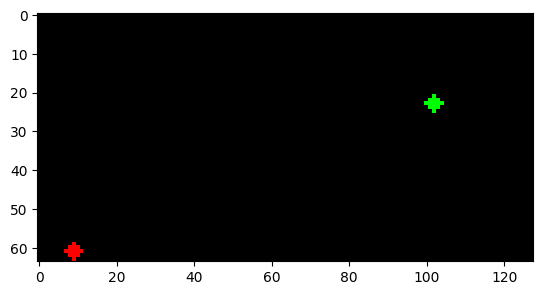

In [359]:
from rl.env import PCGEnv
from rl.wrappers import ChannelFirstObservation,NormalizeObservation
from rl.ppo.policy import Policy
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
env = NormalizeObservation(ChannelFirstObservation(PCGEnv()))

obs = env.reset()
plt.imshow(obs.transpose(1,2,0))
# cv2.imshow('image',obs)
actor_critic = Policy(
    env.observation_space.shape,
    env.action_space,
    base_kwargs={"recurrent": True},
    activation='tanh'
)
actor_critic.load_state_dict(torch.load(
    "/root/mnt/2dpcgenv/checkpoints/ppo/2D PCG_20220921231221.pt"))

rnn_hxs = torch.zeros((1,actor_critic.recurrent_hidden_state_size))


[<rl.env.Block object at 0x7fd2efb27a30>, <rl.env.Block object at 0x7fd2f1c7d9a0>, <rl.env.Block object at 0x7fd2f1dbc580>, <rl.env.Block object at 0x7fd2efb27100>, <rl.env.Block object at 0x7fd2f1ab4fd0>, <rl.env.Block object at 0x7fd2f19efb20>, <rl.env.Block object at 0x7fd2f18414c0>, <rl.env.Block object at 0x7fd2f17739a0>, <rl.env.Block object at 0x7fd2f1506190>, <rl.env.Block object at 0x7fd2f0ef22e0>, <rl.env.Block object at 0x7fd2f09b0a00>]
Action tensor([[-0.3229,  1.0000, -0.7350,  0.3960]])
reward: -0.1
Done: False


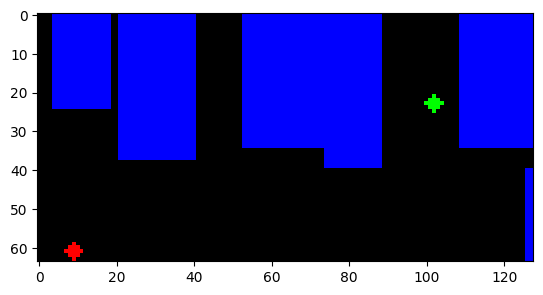

In [427]:
obs = torch.tensor(obs).unsqueeze(0).float()
value, action, action_log_probs, rnn_hxs = actor_critic.act(
    obs,rnn_hxs,masks=1.0, deterministic=False)

obs,reward,done,_ = env.step(action[0].detach().numpy())
print(env.blocks)
print("Action",action)
print("reward:",reward)
print("Done:",done)
plt.imshow(obs.transpose(1,2,0))

In [361]:
# env.reset()